In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
26112,56.973,24.1327,2024-11-16 21:22:51
26113,56.972999572753906,24.132699966430664,2024-11-16 21:23:56
26114,56.9735462,24.1326951,2024-11-16 21:25:08
26115,56.973,24.1327,2024-11-16 21:29:23


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
26112,56.973,24.1327,2024-11-16 21:22:51,2024-11-16 21
26113,56.972999572753906,24.132699966430664,2024-11-16 21:23:56,2024-11-16 21
26114,56.9735462,24.1326951,2024-11-16 21:25:08,2024-11-16 21
26115,56.973,24.1327,2024-11-16 21:29:23,2024-11-16 21


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

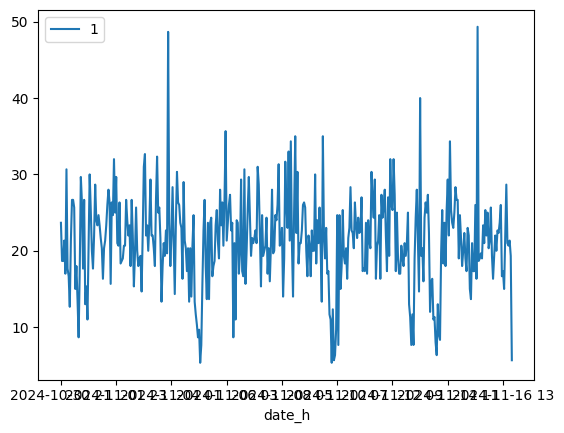

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


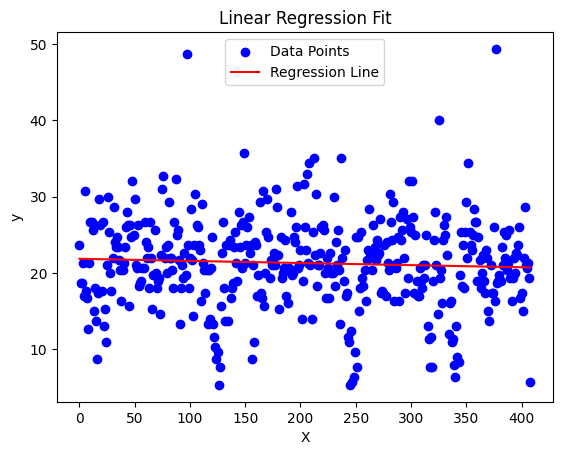

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[21.85044626],
       [21.84767568],
       [21.84490511],
       [21.84213453],
       [21.83936395],
       [21.83659338],
       [21.8338228 ],
       [21.83105222],
       [21.82828164],
       [21.82551107],
       [21.82274049],
       [21.81996991],
       [21.81719934],
       [21.81442876],
       [21.81165818],
       [21.80888761],
       [21.80611703],
       [21.80334645],
       [21.80057588],
       [21.7978053 ],
       [21.79503472],
       [21.79226415],
       [21.78949357],
       [21.78672299],
       [21.78395241],
       [21.78118184],
       [21.77841126],
       [21.77564068],
       [21.77287011],
       [21.77009953],
       [21.76732895],
       [21.76455838],
       [21.7617878 ],
       [21.75901722],
       [21.75624665],
       [21.75347607],
       [21.75070549],
       [21.74793491],
       [21.74516434],
       [21.74239376],
       [21.73962318],
       [21.73685261],
       [21.73408203],
       [21.73131145],
       [21.72854088],
       [21